In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/United Airlines/Datasets/Survey data_Inflight Satisfaction Score.csv')

# dropping unwanted columns
columns_to_drop = ['driver_sub_group1', 'driver_sub_group2', 'ua_uax', 'departure_gate', 'arrival_gate', 'equipment_type_code']
df.drop(columns=columns_to_drop, inplace=True)

# Convert data types
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df.dropna(subset=['score'], inplace=True)

In [ ]:
df0 = df.drop(columns='flight_number')
df0['satisfaction_type'] = df0['satisfaction_type'].map({'Satisfied': 1, 'Dissatisfied': 0})

# Segmenting data by satisfaction_type and finding correlations
correlation_dict = {}
numerical_columns = df0.select_dtypes(include=np.number).columns.tolist()
numerical_columns.remove('satisfaction_type')

for satisfaction_type, group in df0.groupby('satisfaction_type'):
    correlation_matrix = group[numerical_columns].corr()
    correlation_dict[satisfaction_type] = correlation_matrix

# Finding the top correlations for each segment
top_correlations = {}
for satisfaction_type, corr_matrix in correlation_dict.items():
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    top_corr = upper_triangle.abs().stack().nlargest(10)
    top_correlations[satisfaction_type] = top_corr

# Printing the top correlations for each segment
for satisfaction_type, top_corr in top_correlations.items():
    print(f"Top correlations for satisfaction_type: {satisfaction_type}\n{top_corr}\n")

Top correlations for satisfaction_type: 0
number_of_legs         actual_flown_miles       0.146538
score                  actual_flown_miles       0.095782
                       arrival_delay_minutes    0.057595
                       number_of_legs           0.034643
arrival_delay_minutes  actual_flown_miles       0.029250
                       number_of_legs           0.021685
dtype: float64

Top correlations for satisfaction_type: 1
number_of_legs         actual_flown_miles       0.131772
score                  actual_flown_miles       0.082253
arrival_delay_minutes  actual_flown_miles       0.061349
score                  arrival_delay_minutes    0.029776
arrival_delay_minutes  number_of_legs           0.019906
score                  number_of_legs           0.007476
dtype: float64



<ipython-input-2-023e5d1cb95f>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


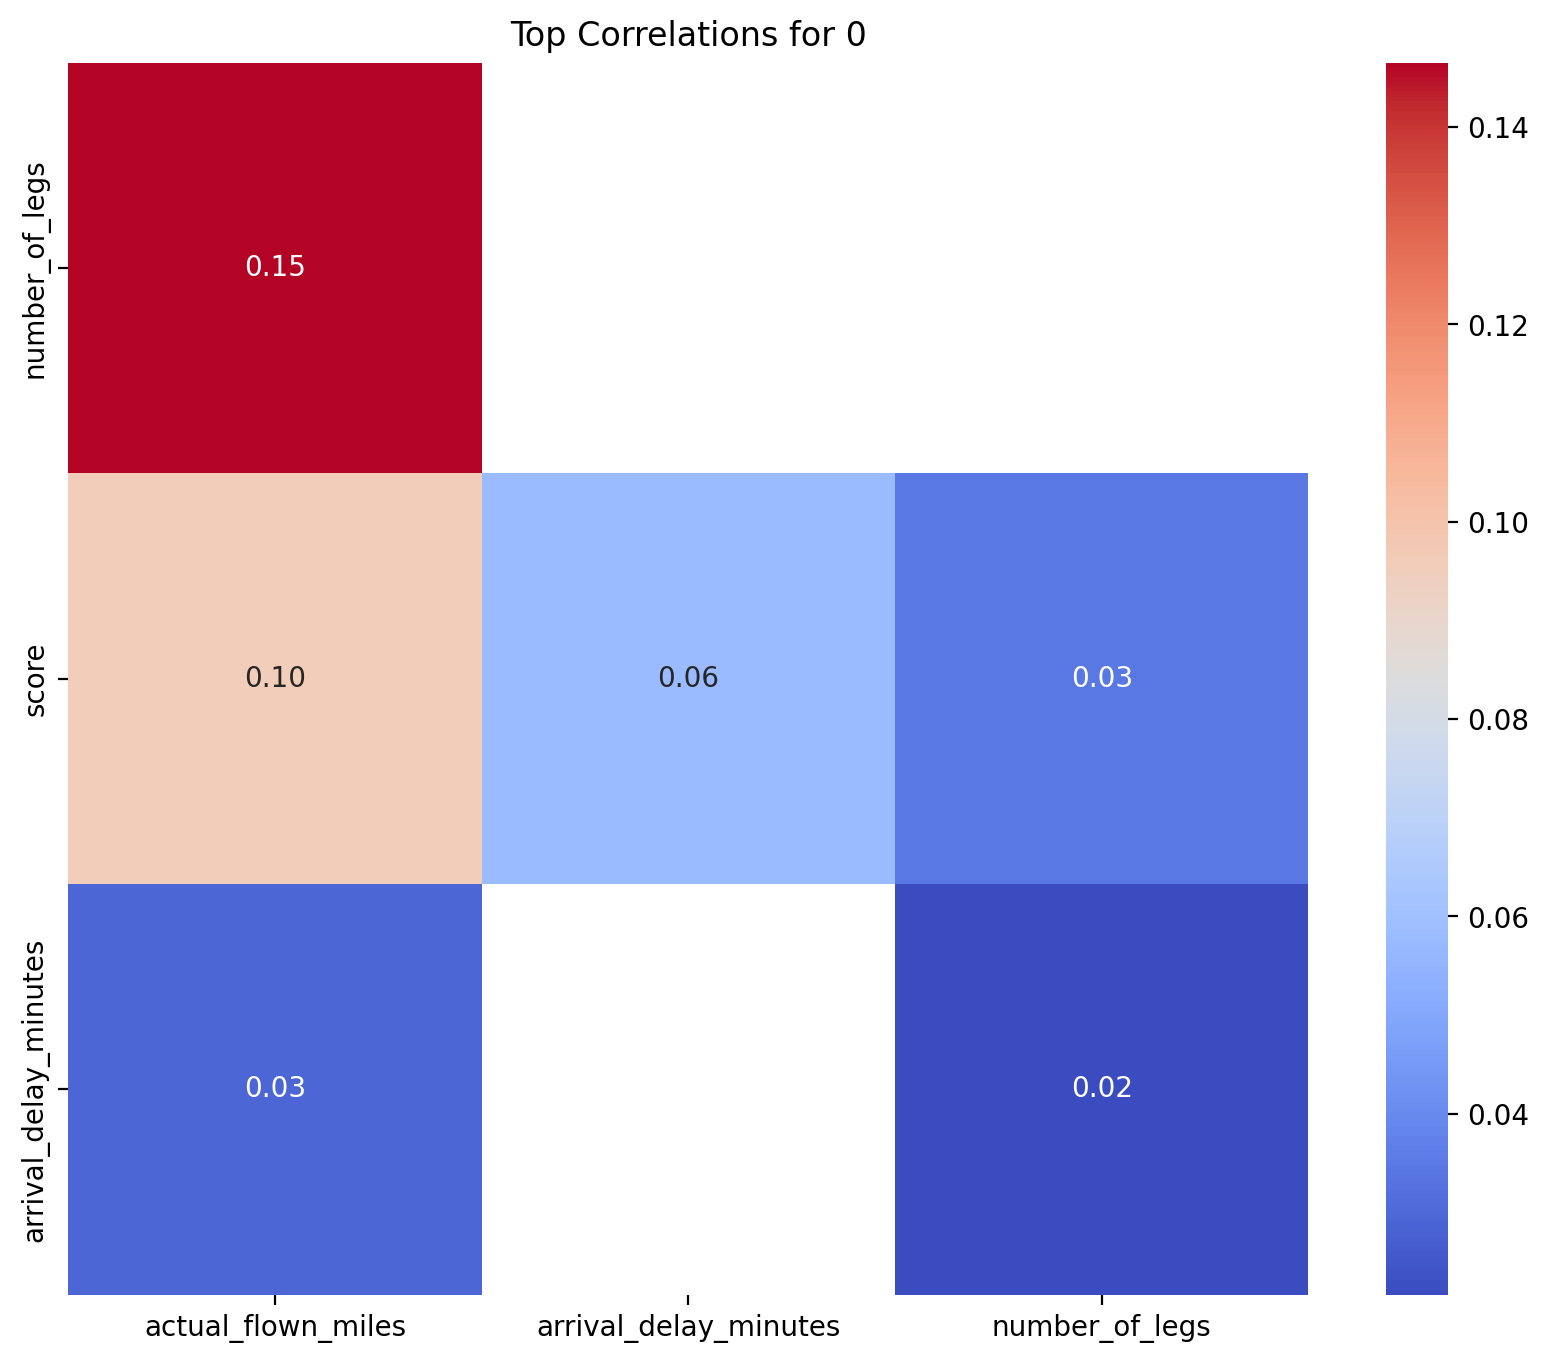

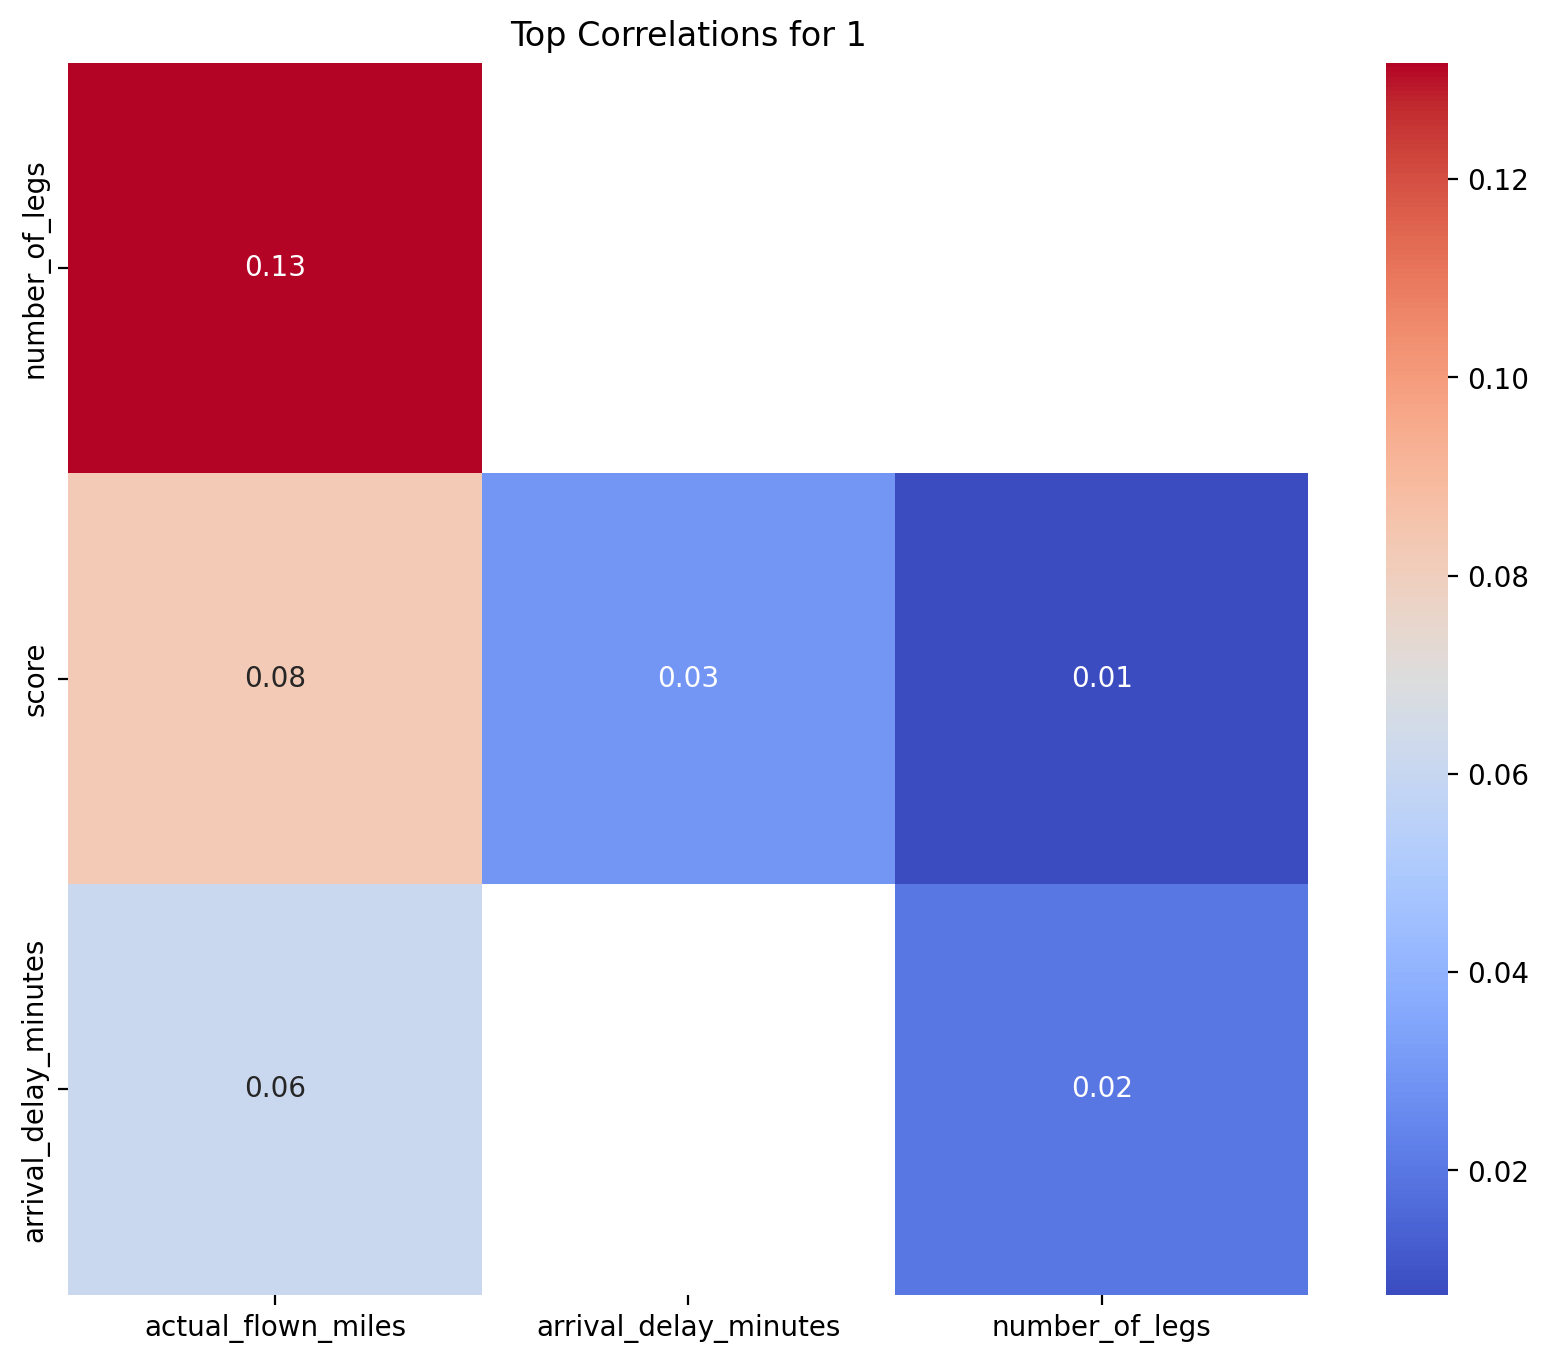

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for satisfaction_type, top_corr in top_correlations.items():
    plt.figure(figsize=(10, 8) , dpi = 200)
    plt.title(f"Top Correlations for {satisfaction_type}")
    sns.heatmap(top_corr.unstack(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.savefig(f"heatmap_{satisfaction_type}.png", bbox_inches='tight')
    plt.show()